<a href="https://colab.research.google.com/github/karsarobert/Machine_learning_2024/blob/main/05/PTE_ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 5. Gyakorlat: Hiányzó adatok kezelése, kategórikus adatok átalakítása, logisztikus regresszió
### 2024. március 5.

##Python gyakorlás

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [ ]:
import pandas as pd

data = {
  "features_1": [420, 380, 390, 354, 235, 128, 841, 562, 264, 893],
  "features_2": [50, 40, 45, 67, 34, 34, 27, 84, 25, 63],
  "target": [5, 80, 76, 12, 45 ,56, 76, 89, 45, 31],
} # Python dictionary-ből készítünk Pandas DataFrame-et

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

   features_1  features_2  target
0         420          50       5
1         380          40      80
2         390          45      76
3         354          67      12
4         235          34      45
5         128          34      56
6         841          27      76
7         562          84      89
8         264          25      45
9         893          63      31


In [ ]:
X = df[['features_1','features_2']]
y = df.target

In [ ]:
from sklearn.model_selection import train_test_split
#adatok felosztása 80-20 %
# X_train tréning bemeneti adatok
# X_valid validációs bemeneti adatok
# y_train tréning kimeneti adatok
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
X_train.shape # 8 adatsor 2 feature

(8, 2)

#DataFrame másolása

In [ ]:
import pandas as pd

data = {
  "name": ["Sally", "Mary", "John"],
  "qualified": [True, False, False]
} #dictionary

df = pd.DataFrame(data)

#Make a copy:

newdf = df.copy() #deep copy

df[0:0]

print(newdf)

    name  qualified
0  Sally       True
1   Mary      False
2   John      False


In [ ]:
df['name'].iloc[0]='Diana'

<ipython-input-11-c472bf73807b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'].iloc[0]='Diana'


In [ ]:
print(newdf)

    name  qualified
0  Sally       True
1   Mary      False
2   John      False


In [ ]:
print(df)

    name  qualified
0  Diana       True
1   Mary      False
2   John      False


#Gépi tanulási munkafolyamat
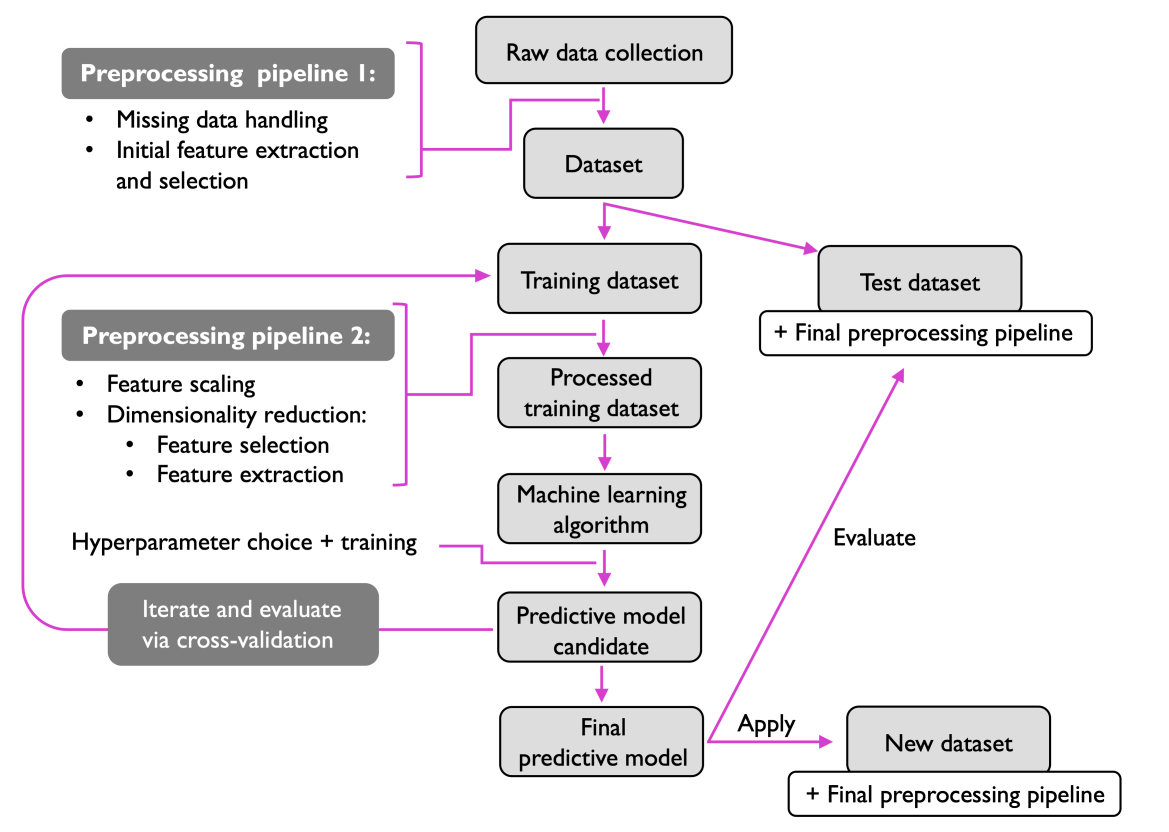

#Adatok előfeldolgozása, hiányzó adatok kezelése
Bevezetés
Az adatok sokféleképpen kerülhetnek hiányzó értékekbe. Például,

Egy 2 hálószobás ház nem tartalmazza a harmadik hálószoba méretének értékét.
Egy felmérésben részt vevő válaszadó dönthet úgy, hogy nem osztja meg a jövedelmét.

A legtöbb gépi tanulási könyvtár (beleértve a scikit-learnt is) hibát ad, ha hiányzó értékeket tartalmazó adatokból próbálunk modellt építeni. Ezért az alábbi stratégiák egyikét kell választania.

# Hiányzó numerikus adatok kezelése, három megközelítés:


### 1) Egy egyszerű lehetőség: A hiányzó értékekkel rendelkező oszlopok elhagyása

A legegyszerűbb lehetőség a hiányzó értékeket tartalmazó oszlopok elhagyása.

![tut2_approach1](https://i.imgur.com/Sax80za.png)

Hacsak a legtöbb érték nem hiányzik az elhagyott oszlopokból, a modell ezzel a megközelítéssel sok (potenciálisan hasznos!) információhoz veszít hozzáférést.  Szélsőséges példaként tekintsünk egy 10 000 sorból álló adathalmazt, ahol egy fontos oszlopból egyetlen bejegyzés hiányzik. Ez a megközelítés az oszlopot teljesen elhagyná!

### 2) Egy jobb lehetőség: Imputálás

Az **Imputáció** a hiányzó értékeket valamilyen számmal tölti ki.  Például minden oszlop mentén kitölthetjük az átlagértéket.

![tut2_approach2](https://i.imgur.com/4BpnlPA.png)

Az imputált érték a legtöbb esetben nem lesz pontosan helyes, de általában pontosabb modellekhez vezet, mintha az oszlopot teljesen elhagynánk.

### 3) Az imputálás kiterjesztése

Az imputálás a standard megközelítés, és általában jól működik. Az imputált értékek azonban szisztematikusan a tényleges értékek felett vagy alatt lehetnek (amelyeket nem gyűjtöttek össze az adatkészletben). Vagy a hiányzó értékekkel rendelkező sorok más módon lehetnek egyediek. Ebben az esetben a modellje jobb előrejelzéseket készíthet, ha figyelembe veszi, hogy eredetileg mely értékek hiányoztak.  

![tut3_approach3](https://i.imgur.com/UWOyg4a.png)

Ebben a megközelítésben a hiányzó értékeket imputáljuk, mint korábban.  És emellett az eredeti adatállományban minden egyes hiányzó bejegyzéssel rendelkező oszlophoz hozzáadunk egy új oszlopot, amely az imputált bejegyzések helyét mutatja.

Bizonyos esetekben ez jelentősen javítja az eredményeket. Más esetekben egyáltalán nem segít.




# Példa

A példában a [Melbourne Housing dataset]  adathalmazzal fogunk dolgozni.  Modellünk olyan információkat fog használni, mint a szobák száma és a telekméret, hogy megjósolja a lakásárakat.

Nem fogunk az adatbetöltési lépésre összpontosítani. Ehelyett képzeljük el, hogy egy olyan ponton vagyunk, ahol már megvannak a képzési és validálási adatok az `X_train`, `X_valid`, `y_train` és `y_valid` fájlokban.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/melb_data.csv')



In [ ]:
data.info() #sok object típusú adatunk van, amelyek nem számok!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [ ]:
# Select target
y = data.Price

melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object']) #Az egyszerűség kedvéért csak numerikus oszlopokat (prediktorokat) használunk.

# Adatok felosztása tréning és teszt adatokra
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#lehet kisérletezni polinomiális megközelítéssel is
#from sklearn.linear_model import Ridge, Lasso
#reg_lasso = Lasso(alpha=0.001)
#reg_ridge = Ridge(alpha=0.1)
# ...



# Az összehasonlítás végett megadunk egy függvényt amely az abszolút hibával tér vissza
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

##Python gyakorlás
1 soros loop

In [ ]:
[i for i in [0,1,2,3,4,5,6,7,8,9] if i>2] # egysoros loop egy listát ad vissza

[3, 4, 5, 6, 7, 8, 9]

### Pontszám az 1. megközelítésből (hagyja ki a hiányzó értékeket tartalmazó oszlopokat)

Mivel mind a gyakorló, mind a validáló halmazokkal dolgozunk, ügyelünk arra, hogy mindkét DataFrame-ben ugyanazokat az oszlopokat ejtsük ki.  

In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount'],
      dtype='object')

In [ ]:
# Visszatér  a hiányzó értékeket tartalmazó oszlopok neveivel egy listában
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()] # ha üres adat egyszer is előfordul

# A tréning és validációs adatokra is elvégezzük az átalakítást
reduced_X_train = X_train.drop(cols_with_missing, axis=1) #itt most oszlopokat dobunk el korábban csak sorokat df.dropna(inplace=True) 2. gyakorlaton
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE az 1. megközelítésből (a hiányzó értékeket tartalmazó oszlopok elhagyása):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE az 1. megközelítésből (a hiányzó értékeket tartalmazó oszlopok elhagyása):
387601.88612712704


### Pontszám a 2. megközelítésből (numerikus adatok imputálása)

Ezután a [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) segítségével a hiányzó értékeket az egyes oszlopok mentén az átlagértékkel helyettesítjük.

Bár egyszerű, az átlagérték kitöltése általában elég jól teljesít (de ez adatkészletenként változik).  Bár a statisztikusok kísérleteztek bonyolultabb módszerekkel is az imputált értékek meghatározására (például **regressziós imputálás**), az összetett stratégiák általában nem nyújtanak további előnyt, ha az eredményeket bonyolult gépi tanulási modellekbe illesztjük.

In [ ]:
from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer


# Adatok pótlása
my_imputer = SimpleImputer(strategy='mean') # mean, median, most_frequent, const

imputed_X_train = my_imputer.fit_transform(X_train) # figyeljük meg, hogy a validációs halmaznál már nem alkalmazzuk a fit függvényt
imputed_X_valid = my_imputer.transform(X_valid) # hiszen az adatszivárgáshoz vezetne

#Az imputálás után numpy tömböket kapunk elegánsabb ezeket vissza alakítani pandas dataframe formátumba
#imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train)) #numpy ndarray típusból pandas dataframe
#imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Az imputáció során az oszlopnevek elvesznek, ezeket vissza állítjuk
#imputed_X_train.columns = X_train.columns
#imputed_X_valid.columns = X_valid.columns

print("MAE a 2. megközelítésből (imputálás):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE a 2. megközelítésből (imputálás):
309328.05982244835


Láthatjuk, hogy a **2. megközelítés** alacsonyabb MAE-vel rendelkezik, mint az **1. megközelítés**, tehát a **2. megközelítés** jobban teljesített ezen az adathalmazon.



##Python gyakorlás

In [ ]:
data = {
  "features_1": [420, 380, 390, 354, 235, 128, 841, 562, 264, 893],
  "features_2": [50, 40, 45, 67, None, 34, 27, 84, 25, 63],
  "target": [5, 80, 76, 12, 45 ,56, 56, 89, 45, 31],
} # Python dictionary-ből készítünk Pandas DataFrame-et

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

   features_1  features_2  target
0         420        50.0       5
1         380        40.0      80
2         390        45.0      76
3         354        67.0      12
4         235         NaN      45
5         128        34.0      56
6         841        27.0      56
7         562        84.0      89
8         264        25.0      45
9         893        63.0      31


In [ ]:
df['features_2'].isnull() #a features_2 oszlop valamennyi elemén végigmegy és ha üres True-val tér vissza

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: features_2, dtype: bool

In [ ]:
df_1 = df.copy()
df_1['features_2_was_missing'] = df['features_2'].isnull()
df_1

,features_1,features_2,target,features_2_was_missing
0,420,50.0,5,False
1,380,40.0,80,False
2,390,45.0,76,False
3,354,67.0,12,False
4,235,NaN,45,True
5,128,34.0,56,False
6,841,27.0,56,False
7,562,84.0,89,False
8,264,25.0,45,False
9,893,63.0,31,False


In [ ]:
my_imputer = SimpleImputer(strategy='mean')

print(my_imputer.fit_transform(df_1)) #az imputer Dataframe bemenetre is numpy tömbbel tér vissza

df1_plus = pd.DataFrame(my_imputer.fit_transform(df_1)) #Numpy ból Dataframe

df1_plus # vegyük észre a logikai értéket is számmá konvertálta
# a Dataframe nél hiányoznak az oszlopnevek

[[420.          50.           5.           0.        ]
 [380.          40.          80.           0.        ]
 [390.          45.          76.           0.        ]
 [354.          67.          12.           0.        ]
 [235.          48.33333333  45.           1.        ]
 [128.          34.          56.           0.        ]
 [841.          27.          56.           0.        ]
 [562.          84.          89.           0.        ]
 [264.          25.          45.           0.        ]
 [893.          63.          31.           0.        ]]


,0,1,2,3
0,420.0,50.000000,5.0,0.0
1,380.0,40.000000,80.0,0.0
2,390.0,45.000000,76.0,0.0
3,354.0,67.000000,12.0,0.0
4,235.0,48.333333,45.0,1.0
5,128.0,34.000000,56.0,0.0
6,841.0,27.000000,56.0,0.0
7,562.0,84.000000,89.0,0.0
8,264.0,25.000000,45.0,0.0
9,893.0,63.000000,31.0,0.0


In [ ]:
df1_plus.columns = df_1.columns #oszlopnevek visszaállítása
df1_plus

,features_1,features_2,target,features_2_was_missing
0,420.0,50.000000,5.0,0.0
1,380.0,40.000000,80.0,0.0
2,390.0,45.000000,76.0,0.0
3,354.0,67.000000,12.0,0.0
4,235.0,48.333333,45.0,1.0
5,128.0,34.000000,56.0,0.0
6,841.0,27.000000,56.0,0.0
7,562.0,84.000000,89.0,0.0
8,264.0,25.000000,45.0,0.0
9,893.0,63.000000,31.0,0.0


### A 3. megközelítés eredménye (Az imputáció kiterjesztése)

Ezután imputáljuk a hiányzó értékeket, miközben nyomon követjük, hogy mely értékeket imputáltuk.

In [ ]:
# Máslatot készítünk az eredeti adatainkról
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Új oszlopokat generálunk az imputált adatok jelzésére
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull() #az új oszlop értékét pedig 1-re állítjuk ha hiány volt
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputáció
my_imputer = SimpleImputer(strategy='mean')
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Az imputáció során az oszlopnevek elvesznek, ezeket vissza állítjuk
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE a 3. megközelítésből (Az imputáció kiterjesztése):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE a 3. megközelítésből (Az imputáció kiterjesztése):
308222.3448531452


A 3. megközelítésnél a MAE kicsit javult!!!

In [ ]:
imputed_X_train_plus.head()

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
0,3349.0,4.0,7.8,3058.0,4.0,2.0,1.0,381.0,152.120627,1938.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2686.0,3.0,7.8,3124.0,3.0,1.0,1.0,544.0,160.000000,1930.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6065.0,2.0,5.6,3101.0,2.0,1.0,1.0,121.0,152.120627,1966.09975,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,11346.0,3.0,7.5,3123.0,3.0,2.0,2.0,200.0,152.120627,1966.09975,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,13474.0,2.0,4.5,3181.0,2.0,1.0,1.0,2842.0,84.000000,1920.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Kategórikus változók kezelése és imputálása

Ebben a részben megtanuljuk, hogy mi az a **kategorikus változó**, valamint három megközelítést ismerhet meg az ilyen típusú adatok kezelésére.

# Bevezetés

A **kategorikus változó** csak korlátozott számú értéket vehet fel.  

- Vegyünk egy felmérést, amely azt kérdezi, hogy milyen gyakran reggelizik, és négy lehetőséget ad meg: "Soha", "Ritkán", "Legtöbbször" vagy "Minden nap".  Ebben az esetben az adatok kategorikusak, mivel a válaszok meghatározott kategóriákba esnek.
- Ha az emberek egy felmérésben arról válaszolnának, hogy milyen autómárkát birtokolnak, a válaszok olyan kategóriákba esnének, mint a "Honda", "Toyota" és "Ford".  Ebben az esetben az adatok szintén kategorikusak.

Hibát fog kapni, ha megpróbálja ezeket a változókat a Pythonban a legtöbb gépi tanulási modellbe bedugni anélkül, hogy előzetesen előfeldolgozná őket.  Ebben a bemutatóban három olyan megközelítést hasonlítunk össze, amelyeket a kategorikus adatok előkészítésére használhat.

# Három megközelítés

### 1) Kategorikus változók elhagyása

A legegyszerűbb megközelítés a kategorikus változók kezelésére az, hogy egyszerűen eltávolítjuk őket az adathalmazból.  Ez a megközelítés csak akkor működik jól, ha az oszlopok nem tartalmaztak hasznos információt.

### 2) Ordinális kódolás

Az **Ordinális kódolás** minden egyes egyedi értéket más-más egész számhoz rendel.

![tut3_ordinalencode](https://i.imgur.com/tEogUAr.png)

Ez a megközelítés feltételezi a kategóriák sorrendiségét: "Soha" (0) < "Ritkán" (1) < "Legtöbbször" (2) < "Minden nap" (3).

Ennek a feltételezésnek ebben a példában van értelme, mivel a kategóriáknak van egy vitathatatlan sorrendje.  Nem minden kategorikus változónak van egyértelmű sorrendje az értékeiben, de azokat, amelyeknek van, **ordinális változóknak** nevezzük.  A fa alapú modellek (például döntési fák és véletlen erdők) esetében elvárható, hogy az ordinális kódolás jól működjön az ordinális változókkal.

### 3) One-Hot kódolás

Az **One-hot kódolás** új oszlopokat hoz létre, amelyek az eredeti adatokban minden lehetséges érték jelenlétét (vagy hiányát) jelzik.  Ennek megértéséhez egy példán keresztül fogunk dolgozni.

![tut3_onehot](https://i.imgur.com/TW5m0aJ.png)

Az eredeti adathalmazban a "Szín" egy kategorikus változó három kategóriával: "Piros", "Sárga" és "Zöld".  A megfelelő one-hot kódolás tartalmaz egy oszlopot minden lehetséges értékhez, és egy sort az eredeti adathalmaz minden sorához.  Ahol az eredeti érték "Piros" volt, ott 1-et teszünk a "Piros" oszlopba; ha az eredeti érték "Sárga" volt, akkor 1-et teszünk a "Sárga" oszlopba, és így tovább.  

Az ordinális kódolással ellentétben az one-hot kódolás *nem feltételezi* a kategóriák sorrendjét.  Így ez a megközelítés különösen jól működik, ha a kategorikus adatokban nincs egyértelmű sorrend (pl. a "Piros" nem _több_ vagy _kevesebb_, mint a "Sárga").  A kategorikus változókat, amelyeknek nincs saját rangsorolásuk, **nominális változóknak** nevezzük.

Az one-hot kódolás általában nem teljesít jól, ha a kategorikus változó nagyszámú értéket vesz fel (azaz általában nem használjuk 15 különböző értéknél több értéket felvevőknél).

# Példa

Az előző bemutatóhoz hasonlóan a [Melbourne Housing dataset]  adathalmazzal fogunk dolgozni.  

Nem fogunk az adatbetöltési lépésre összpontosítani. Ehelyett képzeljük el, hogy egy olyan ponton vagyunk, ahol már megvannak a képzési és validálási adatok az `X_train`, `X_valid`, `y_train` és `y_valid` állományokban.




In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/melb_data.csv')

y = data.Price
X = data.drop(['Price'], axis=1)

# Adatok felosztása
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

X_train.head()

,Type,Method,Unnamed: 0,Rooms
2573,h,SP,3349,4
2091,h,SP,2686,3
4683,u,S,6065,2
8832,h,VB,11346,3
10469,u,S,13474,2


In [ ]:
# A hiányzó adatokat tartalmazó oszlopok eldobása legegyszerűbb megközelítés
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] # hiányzó adatokat tartalmazóoszlopok listája
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)
# nagyon sok oszlopot eldobtunk!!! 13 db-ot szám szerint!!! EZ CSAK A PÉLDA KEDVÉÉRT VAN A VALÓSÁGBAN ILYENT NEM CSINÁLUNK!!!

# "Kardinalitás": az oszlopban található egyedi értékek száma.
# Viszonylag alacsony kardinalitású kategorikus oszlopok kiválasztása (kényelmes, de önkényes)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                        X_train_full[cname].dtype == "object"]

# Numerikus azaz szám értékeket tartalmazó oszlopok kiválasztása
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# A kiválasztott oszlopok alapján az új képzési és validációs adatok kiválasztása
my_cols = low_cardinality_cols + numerical_cols # itt már csak 4 oszlopunk marad az eredeti 19 helyett!!!
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [ ]:
X_train

,Type,Method,Unnamed: 0,Rooms
2573,h,SP,3349,4
2091,h,SP,2686,3
4683,u,S,6065,2
8832,h,VB,11346,3
10469,u,S,13474,2
...,...,...,...,...
9225,u,S,11849,2
13123,u,S,16889,2
9845,h,S,12649,3
10799,h,PI,13887,3


In [ ]:
#nézzük mwg, hogy melyik kategórikus változó hány egyedi értéket tartalmaz
for cname in X_train_full.columns:
   if X_train_full[cname].dtype == "object" :
     print(str(cname) +': '+ str(X_train_full[cname].nunique()))

Suburb: 327
Address: 14547
Type: 3
Method: 5
SellerG: 285
Date: 58


### Pontszám az 1. megközelítésből (kategorikus változók elhagyása)
Gyakorlatban lehetőleg ne alkalmazzuk!!! Értékes információkat veszítünk!!!

A [select_dtypes()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) módszerrel elhagyjuk a `objektum` oszlopokat.

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE az 1. megközelítésből (kategorikus változók elhagyása):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE az 1. megközelítésből (kategorikus változók elhagyása):
387601.88612712704


### Pontszám a 2. megközelítésből (Ordinális kódolás)

A Scikit-learn rendelkezik egy [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) osztállyal, amely az ordinális kódoláshoz használható.  Végighaladunk a kategorikus változókon, és az ordinális kódolót külön-külön alkalmazzuk minden oszlopra.

Ezután megkapjuk a képzési adatok összes kategorikus változójának listáját.

Ezt úgy tesszük, hogy minden oszlop adattípusát (vagy **dtype**) ellenőrizzük.  Az `object` dtype azt jelzi, hogy az oszlop szöveges (elméletileg más is lehetne, de ez a mi céljaink szempontjából lényegtelen).  Ennél az adatkészletnél a szöveges oszlopok kategorikus változókat jelölnek.

In [ ]:
# Kategórikus változók listája
object_cols = [cname for cname in X_train.columns if X_train_full[cname].dtype in ['object']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Készítsünk másolatot az eredeti adatokról, hogy azok ne vesszenek el
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Ordinális kódolás
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols]) # a kategórikus oszlopok ordinális kódolása
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("MAE a 2. megközelítésből (Ordinális kódolás):")
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE a 2. megközelítésből (Ordinális kódolás):
374579.6231007896


In [ ]:
#print(label_X_train['Type'].nunique(),label_X_train['Method'].nunique())
label_X_train.head()
#X_train.head()

,Type,Method,Unnamed: 0,Rooms
2573,0.0,3.0,3349,4
2091,0.0,3.0,2686,3
4683,2.0,1.0,6065,2
8832,0.0,4.0,11346,3
10469,2.0,1.0,13474,2


##One hot encoding pandas segítségével

In [ ]:
s = pd.Series(list('abdca'))
s


0    a
1    b
2    d
3    c
4    a
dtype: object

In [ ]:
pd.get_dummies(s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0


In [ ]:
df = pd.DataFrame({
    'Name': ['Joan', 'Matt', 'Jeff', 'Melissa', 'Devi'],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Female'],
    'House Type': ['Apartment', 'Detached', 'Apartment', None, 'Semi-Detached'],
    'House Area': [120, 20, 87, 57, 73]
    })
df


,Name,Gender,House Type,House Area
0,Joan,Female,Apartment,120
1,Matt,Male,Detached,20
2,Jeff,Male,Apartment,87
3,Melissa,Female,None,57
4,Devi,Female,Semi-Detached,73


In [ ]:
ohe = pd.get_dummies(df['House Type']) #, dummy_na=True)
print(ohe)

   Apartment  Detached  Semi-Detached
0          1         0              0
1          0         1              0
2          1         0              0
3          0         0              0
4          0         0              1


In [ ]:
df.info() # nézzük meg milyen típusúak az adatok object, int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        5 non-null      object
 1   Gender      5 non-null      object
 2   House Type  4 non-null      object
 3   House Area  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
df.select_dtypes(['object'])

,Name,Gender,House Type
0,Joan,Female,Apartment
1,Matt,Male,Detached
2,Jeff,Male,Apartment
3,Melissa,Female,None
4,Devi,Female,Semi-Detached


### A 3. megközelítés eredménye (One-hot kódolás)

A scikit-learn [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) osztályát használjuk a one-hot kódoláshoz.  Számos paraméterrel testre szabható a viselkedése.  
- Beállítjuk a `handle_unknown='ignore'-t, hogy elkerüljük a hibákat, ha a validálási adatok olyan osztályokat tartalmaznak, amelyek nem szerepelnek a képzési adatokban, és a
- a `sparse=False` beállítása biztosítja, hogy a kódolt oszlopok numpy tömbként kerüljenek vissza (ritka mátrix helyett).

A kódoló használatához csak azokat a kategorikus oszlopokat adjuk meg, amelyeket szeretnénk, ha egy-pontos kódolással kódolnánk.  Például a képzési adatok kódolásához megadjuk az `X_train[object_cols]-t. (Az `object_cols` az alábbi kódcellában a kategorikus adatokat tartalmazó oszlopnevek listája, és így az `X_train[object_cols]` tartalmazza a képzési halmaz összes kategorikus adatát.)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding végrehajtása a kategórikus adatokat tartalmazó oszlopokra
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # handle_unknown='ignore'-t, hogy elkerüljük a hibákat, ha a validálási adatok olyan osztályokat tartalmaznak, amelyek nem szerepelnek a képzési adatokban
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_full[object_cols])) #dataframe-et készítünk a tömbből
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid_full[object_cols]))

#X_train[object_cols].head()
OH_cols_train.head()
#print(label_X_train['Type'].nunique(),label_X_train['Method'].nunique())



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:

# One-hot encoding eltüntette az indexeket ezeket vissza kell állítani
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_train.head() # 8 féle érték 8 oszlopot jelent


,0,1,2,3,4,5,6,7
2573,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2091,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4683,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Az eredeti adatkészeltünkből a kategórkus oszlopokat el kell dobni (one-hot encoding jön a helyére)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Konkatenáljuk a one-hot encodingolt és a numerikus adatokat tartalmazó oszlopokat
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):")
print(score_dataset(OH_X_train.values, OH_X_valid.values, y_train.values, y_valid.values))

MAE from Approach 3 (One-Hot Encoding):
374389.2897875943


In [ ]:
OH_X_train.head()

,Unnamed: 0,Rooms,0,1,2,3,4,5,6,7
2573,3349,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2091,2686,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4683,6065,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8832,11346,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10469,13474,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
dummies = pd.get_dummies(data)

In [ ]:
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
dummies.head()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,...,1,0,0,0,1,0,0,0,0,0
1,2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,...,1,0,0,0,1,0,0,0,0,0
2,4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,...,1,0,0,0,1,0,0,0,0,0
3,5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,...,1,0,0,0,1,0,0,0,0,0
4,6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,...,1,0,0,0,1,0,0,0,0,0


# Melyik megközelítés a legjobb?

Ebben az esetben a kategorikus oszlopok elhagyása (**Az 1. megközelítés**) teljesített a legrosszabbul, mivel ennek volt a legmagasabb a MAE-pontszáma.  Ami a másik két megközelítést illeti, mivel a visszaküldött MAE-értékek olyan közel vannak egymáshoz, úgy tűnik, hogy egyiknek sincs érdemi előnye a másikkal szemben.

Általánosságban elmondható, hogy az One-hot kódolás (**3. módszer**) jellemzően a legjobban, a kategorikus oszlopok elhagyása (**1. módszer**) pedig jellemzően a legrosszabbul teljesít, de ez esetről-esetre változik.

# Következtetés

A világ tele van kategorikus adatokkal. Sokkal hatékonyabb adattudós leszel, ha tudod, hogyan kell használni ezt a gyakori adattípust!


##Kategórikus változók imputálása
A fentiekben bemutatott kód a numerikus értékek imputálására szolgál, kategórikus adatokon is műkődik? Igen!
A SimpleImputer osztály támogatja a string értékek vagy pandas kategorikus adatok formájában megjelenített kategorikus adatokat is, ha a "most_frequent" vagy "constant" stratégiát használja:

In [ ]:
import numpy as np

df = pd.DataFrame([["a", "x"], [np.nan, "y"], ["a", np.nan], ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [ ]:
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


#Feladat
olvassuk be a Melburne adatkészletet, y legyen a Price oszlop X-nek válasszuk ki a kategórikus változókat, imputáljuk azokat a most_frequent stratégiával! Az adatok felosztását tréning és validációs részre most nem kell elvégezni!

#Töltsük be az adatokat
pd.read_csv segítségével a data változóba!

In [ ]:
# Adatok betöltése
data = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/melb_data.csv')


# X, y beállítása
df.select_dtypes(['object']) segítségével
df.info() segítségével nézzük meg melyik oszlopokban vannak hiányzó értékek

In [ ]:
y = data.Price
X1 = data.drop(['Price'], axis=1)
X = X1.select_dtypes(['object'])
X.info()

#itt kellene az adatokat felosztani tréning és validációs részekre ha nagyon szigorúak vagyunk, ezt most kihagyjuk!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       18396 non-null  object
 1   Address      18396 non-null  object
 2   Type         18396 non-null  object
 3   Method       18396 non-null  object
 4   SellerG      18396 non-null  object
 5   Date         18396 non-null  object
 6   CouncilArea  12233 non-null  object
 7   Regionname   18395 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


#Imputer létrehozása
SimpleImputer(strategy="most_frequent") segítségével
Az oszolp neveket állítsuk vissza, hiszen ezek is eltünnek!
a újdataframe.columns = eredetidataframe.columns segítségével

In [ ]:
cat_imp = SimpleImputer(strategy="most_frequent")
X_catimp = pd.DataFrame(cat_imp.fit_transform(X))
X_catimp.columns = X.columns
X_catimp.info()

# az adatfelosztást itt is végre lehet hajtani, ez kevésbé szigorú elválasztás hiszen a teljes adatkészletünket már átalakítottuk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       18396 non-null  object
 1   Address      18396 non-null  object
 2   Type         18396 non-null  object
 3   Method       18396 non-null  object
 4   SellerG      18396 non-null  object
 5   Date         18396 non-null  object
 6   CouncilArea  18396 non-null  object
 7   Regionname   18396 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


##Figyelem
A fenti példában az összes kategórikus bemeneti adatra végeztük el az imputálást a gyakorlatban csak a tréning adatokon tanítjuk az imputert

imputed_X_train = my_imputer.fit_transform(X_train) # figyeljük meg, hogy a validációs halmaznál már nem alkalmazzuk a fit függvényt
imputed_X_valid = my_imputer.transform(X_valid) # hiszen az adatszivárgáshoz vezetne

#KNN imputer
legközelebbi szomszédok használata

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = np.array([[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]])
imputer = KNNImputer(n_neighbors=3, weights="uniform") # 'uniform' : egységes súlyok, az egyes szomszédságok minden pontja egyenlő súlyozású
print(X)
print()
print(imputer.fit_transform(X)) # 1+3+8/3

[[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]

[[1. 2. 5.]
 [3. 4. 3.]
 [4. 6. 5.]
 [8. 8. 7.]]


#Python gyakorlás

In [ ]:
import pandas as pd

data = {'Brand': ['HH','TT','FF','AA'],
        'Price': [22000,25000,27000,35000],
        'Year': [2015,2013,2018,2018]
        }

df = pd.DataFrame(data)

print (df)


  Brand  Price  Year
0    HH  22000  2015
1    TT  25000  2013
2    FF  27000  2018
3    AA  35000  2018


In [ ]:
# Évjárat, ár szerinti rendezése csökkenő sorrendben
df.sort_values(by=['Year','Price'], inplace=True, ascending=False)

print(df)

  Brand  Price  Year
3    AA  35000  2018
2    FF  27000  2018
0    HH  22000  2015
1    TT  25000  2013


#Melbourne adatkészlet rendezése régió szerint
tipp: a KNN imputer most a régióban közel lévő házak adataiból tudna dolgozni

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/melb_data.csv')

y = data.Price
X = data.drop(['Price'], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

In [ ]:
X.sort_values(by=['Regionname'], inplace=True, ascending=True)
X.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
17490,22422,Ferntree Gully,27 Malua Rd,2,h,S,Noel,23/09/2017,24.8,3156.0,...,1.0,1.0,733.0,110.0,1950.0,NaN,-37.87101,145.26642,Eastern Metropolitan,10788.0
2814,3657,Doncaster,31 Massey St,3,h,PI,Ray,16/07/2016,13.9,3108.0,...,2.0,2.0,366.0,150.0,2013.0,Manningham,-37.79200,145.10770,Eastern Metropolitan,9028.0
2815,3659,Doncaster,4 Benton Ct,3,h,PI,Jellis,17/09/2016,13.9,3108.0,...,2.0,1.0,728.0,150.0,1965.0,Manningham,-37.78130,145.13180,Eastern Metropolitan,9028.0
13841,17790,Templestowe,19 Athenry Tce,3,h,S,Barry,8/07/2017,15.5,3106.0,...,2.0,2.0,926.0,NaN,NaN,Manningham,-37.75091,145.16761,Eastern Metropolitan,6202.0
13842,17791,Templestowe,7 Clays Ct,4,h,S,Barry,8/07/2017,15.5,3106.0,...,3.0,2.0,896.0,215.0,1985.0,Manningham,-37.76797,145.13799,Eastern Metropolitan,6202.0


In [ ]:
cat_imp = SimpleImputer(strategy="most_frequent")
X_catimp = pd.DataFrame(cat_imp.fit_transform(X))
X_catimp.columns = X.columns
X_catimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     18396 non-null  object
 1   Suburb         18396 non-null  object
 2   Address        18396 non-null  object
 3   Rooms          18396 non-null  object
 4   Type           18396 non-null  object
 5   Method         18396 non-null  object
 6   SellerG        18396 non-null  object
 7   Date           18396 non-null  object
 8   Distance       18396 non-null  object
 9   Postcode       18396 non-null  object
 10  Bedroom2       18396 non-null  object
 11  Bathroom       18396 non-null  object
 12  Car            18396 non-null  object
 13  Landsize       18396 non-null  object
 14  BuildingArea   18396 non-null  object
 15  YearBuilt      18396 non-null  object
 16  CouncilArea    18396 non-null  object
 17  Lattitude      18396 non-null  object
 18  Longtitude     18396 non-n

#Logisztikus regresszió
A logisztikus vagy logit modell egy nemlineáris modell, amelyet számos különböző területen hatékonyan használnak osztályozási feladatokra. A logisztikus modell megértésével egyúttal fontos lépést teszünk egy különösen nagy teljesítményű gépi tanulási modell, a mesterséges neurális hálózatok működésének megértésében. Tehát, mi is pontosan a logisztikus modell? A lineáris modellhez hasonlóan, amely egy lineáris vagy egyenes vonalú függvényből áll, a logisztikus modell a standard logisztikus függvényből áll, amely matematikailag valahogy így néz ki:

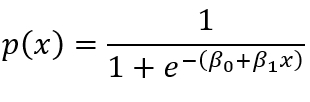

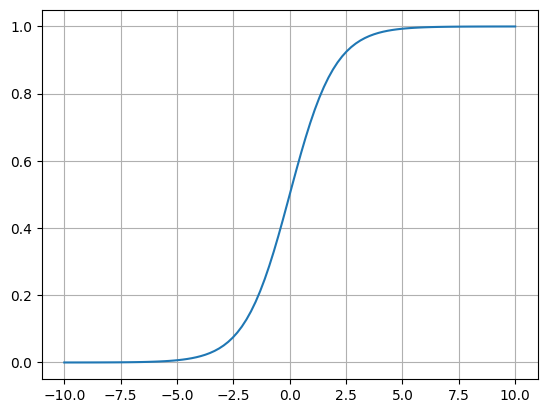

In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x,y)
plt.grid(True)

Ebben az esetben az x értékeinek változása az y-t 0 és 1 között mozgatja. Az x és együtthatói szorzatának magasabb értékei az y-t közelebb viszik az 1-hez, az alacsonyabb értékek pedig a 0 felé. Azt is tudjuk, hogy a valószínűségek 0 és 1 közötti értékeket vesznek fel. Így van értelme az y-t úgy értelmezni, mint annak valószínűségét, hogy y egy bizonyos osztályba tartozik, ha x értéke adott. Ha nem akarunk valószínűségekkel foglalkozni, akkor egyszerűen megadhatjuk ; akkor a mintánk az 1 osztályba tartozik, egyébként pedig a 0 osztályba.

A logisztikus regressziós modell betanításához szükségünk van egy célfüggvényre, valamint egy megoldóra, amely megpróbálja megtalálni az optimális együtthatókat, hogy minimalizálja ezt a függvényt.

célfüggvény (költségfüggvény)
A képzési fázis során az algoritmus végighalad az adatokon, és megpróbálja megtalálni azokat az együtthatókat, amelyek minimalizálják egy előre meghatározott költségfüggvényt. A költségfüggvényt, amelyet a logisztikus regresszió esetében minimalizálni próbálunk, log veszteségnek nevezzük. Ez azt méri, hogy a megjósolt valószínűségek (p) milyen messze vannak a tényleges osztálycímkéktől (y) a következő képlet segítségével:

##log(p) ha y=1, egyébként -log(1 - p)


##Regularizáció
Továbbá a logisztikus regressziós algoritmusok scikit-learn általi implementációja alapértelmezés szerint regularizációt használ. Alapértelmezésben L2 regularizációt használ (mint a ridge regresszorban), de használhat L1-et (mint a lassóban) vagy L1 és L2 keverékét (mint az elastic-netben).

##Megoldók (solver)
Végül hogyan találjuk meg az optimális együtthatókat a veszteségfüggvényünk minimalizálásához? Egy naiv megközelítés az lenne, hogy az együtthatók összes lehetséges kombinációját kipróbáljuk, amíg a minimális veszteséget meg nem találjuk. Mivel azonban a kimerítő keresés a végtelen kombinációk miatt nem kivitelezhető, a legjobb együtthatók hatékony keresésére megoldók szolgálnak. A scikit-learn körülbelül fél tucat módszert implementál.

A solver kiválasztása, valamint az alkalmazott regularizációs módszer a logisztikus regressziós algoritmus konfigurálásakor meghozandó két fő döntés. A következő szakaszban megnézzük, hogyan és mikor válasszuk ki az egyes megoldókat.

##A logisztikus regressziós osztályozó konfigurálása
Mielőtt a megoldókról beszélnénk, nézzünk át néhány általánosan használt hiperparamétert:

**fit_intercept:** Általában az egyes jellemzők együtthatója mellett van egy állandó metszéspont is az egyenletben. Mindazonáltal vannak olyan esetek, amikor nincs szükségünk metszőpontra - például ha biztosan tudjuk, hogy az y értékének 0,5-nek kell lennie, amikor az x összes értéke 0. Egy másik eset az, amikor az adataink már tartalmaznak egy további konstans oszlopot, amelynek minden értéke 1. Ez általában akkor fordul elő, ha az adataink egy korábbi fázisban feldolgozásra kerültek, mint a polinomfeldolgozó esetében. Ebben az esetben a konstans oszlop együtthatója interceptként értelmeződik. Ugyanez a konfiguráció áll fenn a korábban ismertetett lineáris regressziós algoritmusok esetében is.

**max_iter:** Ahhoz, hogy a megoldó megtalálja az optimális együtthatókat, többször is végighalad a képzési adatokon. Ezeket az iterációkat epoch-nak (korszakok) is nevezik. Általában az iterációk számának korlátját állítjuk be, hogy megakadályozzuk a túlillesztést. Ugyanezt a hiperparamétert használja a korábban ismertetett lasso és ridge regresszor is.

**tol:** Ez egy másik módja annak, hogy a megoldó ne iteráljon túl sokat. Ha ezt magas értékre állítja, akkor ez azt jelenti, hogy csak az egyik iteráció és a következő közötti nagy javulást tolerálja; ellenkező esetben a megoldó leáll. Ezzel szemben egy alacsonyabb érték esetén a megoldó több iteráción keresztül folytatja a munkát, amíg el nem éri a max_iter értéket.

**penalty:** Ez választja ki az alkalmazandó regularizációs technikákat. Ez lehet L1, L2, elastic-net, vagy none a regularizálás mellőzéséhez. A regularizáció segít megelőzni a túlillesztést, ezért fontos használni, ha sok jellemzővel rendelkezik. Emellett enyhíti a túlillesztés hatását, ha a max_iter és atol nagy értékekre van beállítva.

**C vagy alfa:** Ezek a paraméterek annak beállítására szolgálnak, hogy milyen erős legyen a regularizáció. Mivel itt a logisztikus regressziós algoritmus két különböző implementációját fogjuk használni, fontos tudni, hogy mind a két implementáció más-más paramétert használ (C versus alpha). alpha lényegében a C-() inverze. Ez azt jelenti, hogy a C kisebb értékei erősebb regularizációt határoznak meg, míg az alfa esetében nagyobb értékek szükségesek az erősebb regularizációhoz.

**l1_ratio:** Ha az L1 és az L2 keverékét használjuk, mint az elasztikus-hálóban, ez a hányados határozza meg, hogy mekkora súlyt adjunk az L1-nek az L2-vel szemben.



##Solverek
**liblinear:** Ez a megoldó a LogisticRegression-ban van implementálva, és kisebb adathalmazokhoz ajánlott. Támogatja az L1 és L2 regularizációt, de nem használhatja, ha elasztikus hálót szeretne használni, és akkor sem, ha egyáltalán nem akar regularizációt használni.

**sag vagy saga:** Ezeket a megoldókat a LogisticRegression és a RidgeClassifier implementálja. Nagyobb adathalmazok esetén gyorsabbak. Azonban skáláznia kell a jellemzőit ahhoz, hogy konvergálni tudjanak. Korábban a MinMaxScaler-t használtuk a jellemzőink skálázására. Most már nemcsak az értelmesebb együtthatókhoz van rá szükség, hanem ahhoz is, hogy a solver hamarabb találjon megoldást. saga mind a négy büntetési opciót támogatja.

**lbfgs:** Ez a solver LogisticRegression-ban van implementálva. Támogatja az L2 büntetést vagy a regularizáció kihagyását.

**Stochastic Gradient Descent (SGD):** Az SGD-nek vannak dedikált implementációi: SGDClassifier és SGDRegressor. Ez különbözik a LogisticRegression-tól, ahol a logisztikus regresszió elvégzésére helyeződik a hangsúly az egy veszteségfüggvény-log veszteség optimalizálásával. Az SGDClassifier középpontjában maga az SGD-megoldó áll, ami azt jelenti, hogy ugyanaz az osztályozó lehetővé teszi különböző veszteségfüggvények használatát. Ha a veszteséget log-ra állítjuk, akkor logisztikus regressziós modellről van szó. Ha azonban a veszteséget hinge vagy perceptron értékre állítjuk, akkor Support Vector Machine (SVM), illetve perceptron lesz belőle. Ez két másik lineáris osztályozó.

In [ ]:
import pandas as pd

# Load data using read_csv()
df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/diabetes.csv')

y = df.label
X= df.drop(['label'], axis = 1)
df


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[98,  9],
       [18, 29]])

#ROC görbe

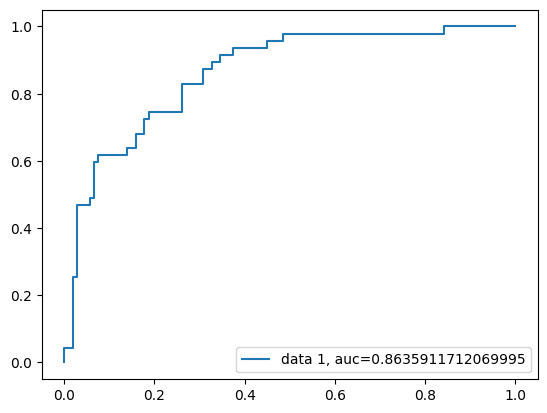

In [ ]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

#Házi feladat
A Melbourne dataset felhasználásával készítsen egy lineáris regresszort a lakásárak (Price) meghatározására, úgy hogy a hiányzó adatokat (numerikus és kategórikus) imputálással pótolja (stratégiát Ön választ, adatot ne dobjon el). A modell építés során numerikus és kategórikus adatokat is használja fel! Az adatokat ossza fel 80% tréning, 20% validációs részre az imputálás után. A modellt értékelje ki MAE, R2 segítségével.

Folyamatok:
- adatok betöltése
- adatok felosztása tréning, teszt DataFramekre
- adatok (tréning, teszt) szétválasztása numerikus és kategórikus részekre
- adatok imputálása
- a kategórikus adatok kódolása
- numerikus és kategórikus adatok összefűzése (pd.concat([num_X_train, OH_cols_train], axis=1))
- modell készítése
- kiértékelés


